In the previous notebooks, we explored the dataset and the clustering algorithms, and concluded that KMeans  (with k=11) is the best clustering method for our music recommendation system. If we have a different dataset, we can run the code in the previous notebooks to get the optimal k value correponding to it. It is worth noting that KMeans is the simplest clustering method that we tested, yet it outperformed all the other ones.

In the following notebook, we are going to apply what we learned previously to the music recommendation system. So far, we know that for our dataset, we have 11 distinct clusters. Each containing songs that are similar. So, the question is: **How can we use these clusters to recommend a song for a user based on it music listening history?** One possible approach is explained below.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from collections import Counter

from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Data Loading and Preparation

data = pd.read_csv("data.csv")
data = data.sample(frac=1).reset_index(drop=True) # Shuffle the dataframe rows
data = data[:6000]

# Fill out missing values with 0
data = data.fillna(0)

features = ['duration_ms', 'danceability', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']

# Feature scaling
scaler = StandardScaler(with_mean=True, with_std=True).fit(data[features])
scaled_data = scaler.transform(data[features])

In [3]:
# Let us explore our new clusters

data.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRQNSSP128F147182B,Valkyrie Missile,Angels & Airwaves,https://p.scdn.co/mp3-preview/375897b1da66f851...,1pCpaN3L7K5fl5FkQhzY5p,"rock, alternative, alternative_rock, punk, pun...",Rock,2006,399453,0.497,...,9,-7.426,1,0.0375,0.004940,0.148000,0.107,0.1520,151.020,4
1,TRUTRVZ128F422C116,The Summoning,Linkin Park,https://p.scdn.co/mp3-preview/bda6eeed6be915df...,2R1PDwtngmzEMgigHCP1VM,"rock, ambient, instrumental, nu_metal",0,2014,60440,0.294,...,9,-8.833,0,0.7690,0.914000,0.099200,0.713,0.0397,143.747,3
2,TRFLCQU128E0796A3B,Destroy Everything You Touch,Ladytron,https://p.scdn.co/mp3-preview/7b42d8ae952d18c8...,0j90VKnkde4azQTqBtZLvq,"electronic, indie, female_vocalists, dance, br...",0,2005,276508,0.528,...,4,-6.172,0,0.0314,0.009280,0.000022,0.179,0.7200,120.310,4
3,TRLCTSY128E079295A,What's Left For Me?,Days of the New,https://p.scdn.co/mp3-preview/51695eb65ba95e2d...,1668OjC7SnY5uAhs3xl3Rs,"alternative_rock, 90s, grunge",Rock,1997,326320,0.558,...,1,-7.855,0,0.0245,0.013100,0.000071,0.174,0.1350,134.492,3
4,TRBYTVE128F93098E7,Donkey Rhubarb,Aphex Twin,https://p.scdn.co/mp3-preview/0b206d124e08f75e...,0c0PhGTdl4K1SRWu0kYkBh,"electronic, idm",Electronic,1995,368173,0.745,...,0,-8.510,1,0.0685,0.000555,0.926000,0.203,0.7140,140.017,4


In [4]:
scaler = StandardScaler(with_mean=True, with_std=True).fit(data[features])
scaled_data = scaler.transform(data[features])

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
data_2D = pca.transform(scaled_data)

pca_3D = PCA(n_components=3)
pca_3D.fit(scaled_data)
data_3D = pca_3D.transform(scaled_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


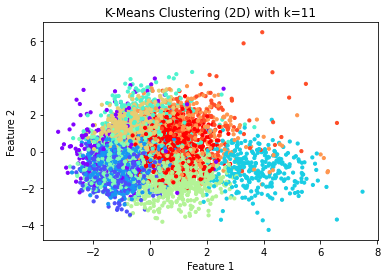

In [5]:
kmeans = KMeans(n_clusters = 11)
KMeans_labels = kmeans.fit_predict(scaled_data)

# Plot

plt.scatter(data_2D[:, 0], data_2D[:, 1], c=KMeans_labels, cmap='rainbow', s=10)
plt.title('K-Means Clustering (2D) with k=11')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


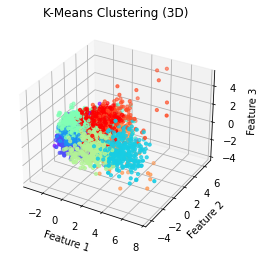

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_3D[:, 0], data_3D[:, 1], data_3D[:, 2], c=KMeans_labels, cmap='rainbow', s=10)
ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

In [7]:
KMeans_labels.shape

(6000,)

In [8]:
# Let us first see what kind of music each cluster contains by extracting their tags.
    
# Dictionary to store sample indices for each cluster
cluster_indices = {i: [] for i in range(11)}

for i, label in enumerate(KMeans_labels):
    cluster_indices[label].append(i)

for cluster, indices in cluster_indices.items():
    #print(f"Cluster {cluster} has {len(indices)} samples with indices: {indices}")
    print(f"Cluster {cluster} has {len(indices)} samples.")

Cluster 0 has 228 samples.
Cluster 1 has 732 samples.
Cluster 2 has 743 samples.
Cluster 3 has 302 samples.
Cluster 4 has 353 samples.
Cluster 5 has 933 samples.
Cluster 6 has 602 samples.
Cluster 7 has 797 samples.
Cluster 8 has 408 samples.
Cluster 9 has 186 samples.
Cluster 10 has 716 samples.


In [9]:
# For each cluster, extract the 10 most common tags

for i in range(11):
    
    tags = data['tags'][cluster_indices[i]]
    combined_string = ','.join(str(tag) for tag in tags)
    all_strings = combined_string.split(',')
    #unique_values = list(set(all_strings))
    string_counts = Counter(all_strings)  # count the occurence of each tag
    # Get the 10 most common tags
    most_common_tags = string_counts.most_common(10)
    most_common_strings = [tag for tag, count in most_common_tags]

    print(f"The 10 most common tags in cluster {i} are: {most_common_strings}\n")

The 10 most common tags in cluster 0 are: [' hip_hop', 'rap', 'electronic', 'reggae', ' 90s', ' rap', ' rnb', ' 00s', ' experimental', ' electro']

The 10 most common tags in cluster 1 are: ['rock', ' alternative', ' indie', 'electronic', ' indie_rock', 'pop', ' alternative_rock', ' pop', ' female_vocalists', ' classic_rock']

The 10 most common tags in cluster 2 are: ['rock', ' alternative', ' alternative_rock', ' indie', ' indie_rock', ' female_vocalists', 'electronic', ' pop', 'pop', ' 90s']

The 10 most common tags in cluster 3 are: [' piano', ' instrumental', 'ambient', 'electronic', ' ambient', ' new_age', 'instrumental', ' chillout', ' experimental', ' soundtrack']

The 10 most common tags in cluster 4 are: ['rock', 'electronic', ' alternative_rock', ' hard_rock', ' classic_rock', 'metal', ' alternative', ' 70s', ' indie', ' heavy_metal']

The 10 most common tags in cluster 5 are: ['rock', 'electronic', ' alternative', ' alternative_rock', ' female_vocalists', ' indie', ' pop', 

It seems like there quite a few common tags in the clusters, so maybe tags is not a good indicator of the songs.

In [10]:
# Assume one user has a music history consisting of 10 songs 
music_history = data.sample(10)

# Then to recommend a new song to him, we first compute the mean of the features of its music history
feature_means = music_history[features].mean()
scaled_mean = scaler.transform(feature_means.to_numpy().reshape(1, -1))

# Next, we predict in which cluster feature_means belong
cluster = kmeans.predict(scaled_mean)
print('Predicted Cluster: ', cluster)

Predicted Cluster:  [10]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
# Now that we know in which cluster the mean of the music history belongs, we can give music recommendations to the user
# To do that, we are going to computing the similarty

cluster_data = scaled_data[KMeans_labels == cluster]

# Calculate pairwise distances between the sample and all data points in the cluster using the euclidean metric
distances = pairwise_distances(scaled_mean.reshape(1, -1), cluster_data, metric='euclidean')
sorted_indices = np.argsort(distances.ravel())

# Extract the song names of the top 10 most similar songs
top_10_similar_songs = data['name'][sorted_indices[:10]]
top_10_similar_songs = '\n'.join(top_10_similar_songs)
print('10 Recommended Songs: \n', top_10_similar_songs)

10 Recommended Songs: 
 You, You're Awesome
Cannibal Rights
Alcarda
The Night Masquerade
Summertime Den
I've Had Enough
Rustin Man
Sickening Metamorphosis
Pendulum
Why Do Fools Fall in Love


In [12]:
# We can also use the cosine similarity

cosine_similarities = cosine_similarity(scaled_mean.reshape(1, -1), cluster_data)

sorted_indices = np.argsort(cosine_similarities.ravel())[::-1] 

top_10_similar_songs = data['name'][sorted_indices[:10]]
top_10_similar_songs = ' \n'.join(top_10_similar_songs)
print('10 Recommended Songs: \n', top_10_similar_songs)

10 Recommended Songs: 
 Legion 
Who's Going Home With You Tonight? 
Alcarda 
Greater Than/Less Than 
Bringin' It Straight From Alabama 
Rustin Man 
Ares 
Mistral 
Lugdūnon 
I'm So Sorry


We see that the recommendations are different. Overall, the cluster provides a hard boundary from which we can choose the songs. We also choose songs that dissimilar to our user's music history but still in the cluster. In this way, we can introduce more variability in the recommendations and recommend a song that the user is not used to listen to but that he may enjo

In [26]:
import numpy as np
from collections import Counter
from sklearn.metrics import average_precision_score

# Assuming you have the recommendations in top_10_similar_songs
user_recommendations = set(data['name'][sorted_indices])

# Create a dictionary that maps cluster indices to their songs
cluster_songs = {}
for i in range(11):  # Assuming you have 11 clusters
    cluster_songs[i] = data['name'][cluster_indices[i]].values

# Initialize a list to store the AP scores for each cluster
ap_scores = {}

for cluster_index, cluster_song_names in cluster_songs.items():
    # Calculate ground truth for the cluster
    cluster_ground_truth = [1 if song in user_recommendations else 0 for song in cluster_song_names]

    # Calculate AP for the cluster
    ap = average_precision_score(cluster_ground_truth, np.arange(1, len(cluster_song_names) + 1))
    ap_scores[cluster_index] = ap

# Calculate MAP as the mean of AP scores
map_score = np.mean(list(ap_scores.values()))

for cluster_index, ap in ap_scores.items():
    print(f"Cluster {cluster_index} - AP: {ap}")

print(f"Mean Average Precision (MAP): {map_score}")

Cluster 0 - AP: 0.06150717872403289
Cluster 1 - AP: 0.04791169237585684
Cluster 2 - AP: 0.06237910317577342
Cluster 3 - AP: 0.0566110133962638
Cluster 4 - AP: 0.06804992027015072
Cluster 5 - AP: 0.07191290052984407
Cluster 6 - AP: 0.06226570542083079
Cluster 7 - AP: 0.06479491207473576
Cluster 8 - AP: 0.0665046690928914
Cluster 9 - AP: 0.0643030166295834
Cluster 10 - AP: 0.06559703531109644
Mean Average Precision (MAP): 0.0628942860910054
